In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
df.shape

(2227, 3)

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df['x2'].mode()

0   -113.0
1    -55.0
dtype: float64

In [5]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [6]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [7]:
df['x1'] = df['x1'].fillna(df['x1'].mode()[0])
df['x2'] = df['x2'].fillna(df['x2'].mode()[0])

In [8]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

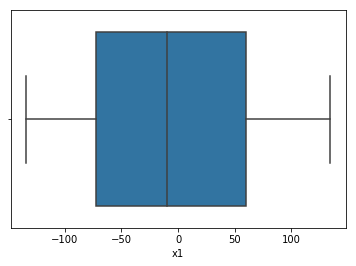

In [9]:
import seaborn as sns
sns.boxplot(x=df['x1'])

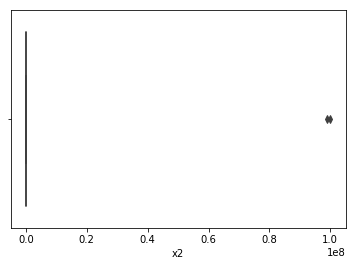

In [10]:
import seaborn as sns
sns.boxplot(x=df['x2'])

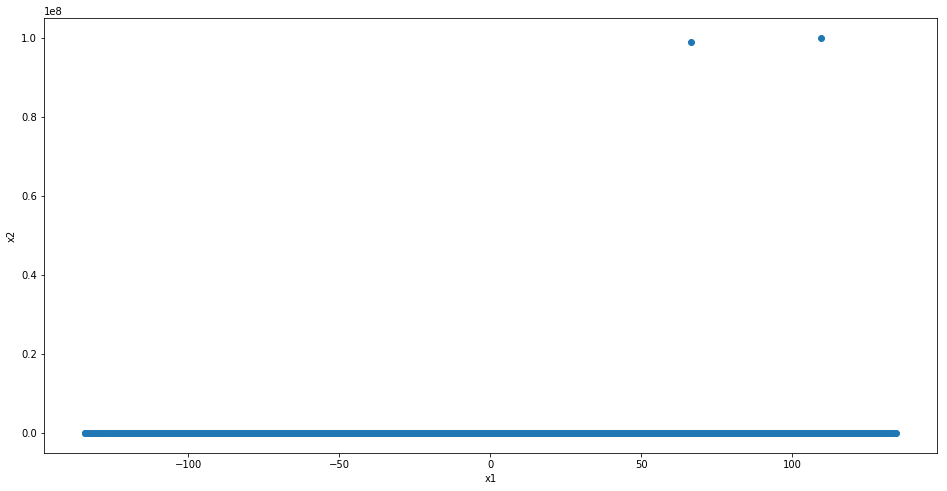

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['x1'], df['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

x1    131.803998
x2    144.333978
y       1.000000
dtype: float64


# Feature Scaling

In [13]:
df_scaled = df.copy()
col_names = ['x1', 'x2']
features = df_scaled[col_names]
features.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,x1,x2,y
0,-0.828630,0.807614,1
1,-0.690102,0.688287,1
2,-0.911420,0.750577,1
3,-0.793250,0.711971,1
4,-0.828630,0.807614,1
5,-0.844009,0.842516,1
6,-0.701193,0.799581,1
7,-0.819594,0.776164,1
8,-0.821043,0.807614,1
9,-0.702416,0.862507,1


In [15]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# Modeling

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Logistic Regression

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [19]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[153, 149],
       [115, 140]], dtype=int64)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.526032315978456
Precision: 0.4844290657439446
Recall: 0.5490196078431373


# SVM Linear

In [21]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5421903052064632


In [23]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM rbf

In [24]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6606822262118492


In [26]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.875
Recall: 0.30196078431372547


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.926391382405745


# KNN

In [29]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533213644524237
